In [69]:
import numpy as np
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt

In [70]:
#Importing csv file with already calculated returns
StockReturns = pd.read_csv('BIGRETURNS.csv')
#Adjusting towards our own prefferences, also avoiding mistakes by chosing format of datetime
StockReturns['Date'] = pd.to_datetime(StockReturns['Date'], format='%d/%m/%Y')

In [71]:
StockReturns.head()

,Date,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
0,2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
1,2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2,2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
3,2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
4,2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


In [72]:
# The idea about using DF instead ofsrd coding, and eliminating Date ?
StockReturnValues = StockReturns.loc[:, StockReturns.columns !='Date']

In [73]:
# it usually appeared to be mistaken to try to keep date, as two different operands can't be used together
StockReturnValues.head()


,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
0,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
1,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
3,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
4,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


In [74]:
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

In [75]:
# Calculate the market cap weights by dividing by addition of market caps
mcap_weights = market_capitalizations/sum(market_capitalizations)

In [76]:
mcap_weights

array([0.18599625, 0.1450994 , 0.10807084, 0.09600524, 0.09269355,
       0.1103714 , 0.08314188, 0.1025266 , 0.07609485])

In [77]:
# Calculate the market cap weighted portfolio returns 
# We create new column StockReturns['Portfolio_Mcap'] by multiplication of all stocks by axis 1 
StockReturns['Portfolio_MCap'] = StockReturnValues.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)


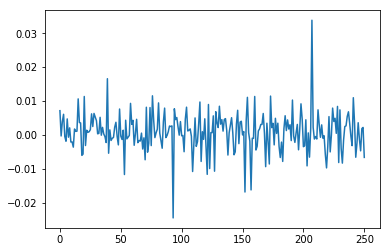

In [78]:
StockReturns['Portfolio_MCap'].plot()

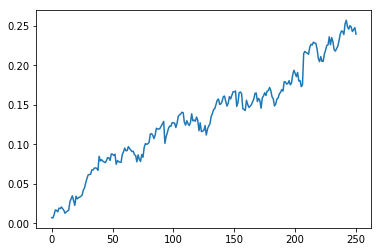

In [79]:
# Plot the cumulative portfolio returns in market cap over time
CumulativeReturnsMCap = ((1+StockReturns["Portfolio_MCap"]).cumprod()-1)
CumulativeReturnsMCap.plot()
plt.show()

In [80]:
StockReturns.head()

,Date,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio_MCap
0,2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.007132
1,2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,-0.000329
2,2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.003903
3,2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924,0.006068
4,2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585,-0.000478


In [81]:
# now let's compare the Equally weighted portfolio (EW)
# How many stocks are in your portfolio?
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks,numstocks)

In [82]:
# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturnValues.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

In [83]:
StockReturns['Portfolio_EW'].head()


0    0.007605
1   -0.000174
2    0.003374
3    0.004458
4   -0.001565
Name: Portfolio_EW, dtype: float64

In [85]:
StockReturns.head()


,Date,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio_MCap,Portfolio_EW
0,2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.007132,0.007605
1,2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,-0.000329,-0.000174
2,2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.003903,0.003374
3,2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924,0.006068,0.004458
4,2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585,-0.000478,-0.001565


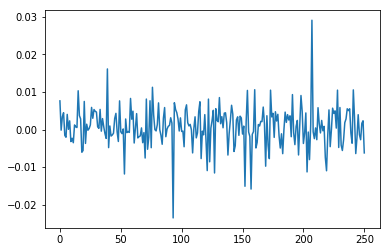

In [86]:
plt.plot(StockReturns["Portfolio_EW"])

Text(0, 0.5, 'Performance')

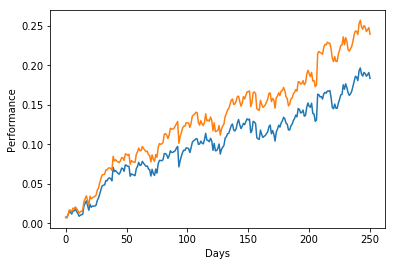

In [94]:
#Difference in Equally weighted portfolio and Portfolio Weighted by Market Cap.
plt.plot((1+StockReturns["Portfolio_EW"]).cumprod()-1)
plt.plot((1+StockReturns["Portfolio_MCap"]).cumprod()-1)
plt.xlabel("Days")
plt.ylabel("Performance")